# Indonesia Tourism Destination Recommender

Pariwisata merupakan salah satu sektor strategis dalam pembangunan ekonomi Indonesia. Berdasarkan data Badan Pusat Statistik (BPS), jumlah perjalanan wisatawan nusantara (wisnus) pada tahun 2023 mencapai 741,82 juta perjalanan, meningkat 11,45% dibandingkan tahun sebelumnya. Sementara itu, jumlah kunjungan wisatawan mancanegara (wisman) juga mengalami peningkatan signifikan. Hingga Oktober 2023, total kunjungan mencapai hampir 9,5 juta, melampaui target tahunan sebesar 8,5 juta kunjungan. Informasi ini disampaikan oleh Kementerian Pariwisata dan Ekonomi Kreatif (Kemenparekraf) dalam siaran pers resmi. Namun demikian, data menunjukkan bahwa kunjungan wisatawan—baik domestik maupun mancanegara—masih terkonsentrasi di destinasi wisata populer seperti Bali, Yogyakarta, dan Bandung. Dalam laporan "Statistik Wisatawan Nusantara 2023", provinsi-provinsi dengan infrastruktur dan promosi wisata yang kuat mendominasi jumlah perjalanan. Hal ini mengindikasikan adanya ketimpangan distribusi wisatawan, yang dapat menimbulkan fenomena overtourism di satu sisi, dan kurangnya eksposur terhadap destinasi potensial di sisi lainnya.

Di sisi lain, dengan semakin meluasnya akses internet, sebagian besar wisatawan kini merencanakan perjalanannya secara mandiri. Berdasarkan laporan Google Travel Trends 2023, sebanyak 68% wisatawan Indonesia mencari inspirasi wisata melalui internet. Namun, 52% di antaranya merasa kewalahan karena terlalu banyak pilihan informasi yang tersedia secara daring (information overload). Akibatnya, calon wisatawan justru mengalami kesulitan dalam menentukan tujuan yang sesuai dengan preferensi dan kebutuhan mereka. Kondisi tersebut menegaskan pentingnya pemanfaatan teknologi cerdas untuk membantu wisatawan dalam proses pengambilan keputusan. Teknologi seperti recommender system berbasis kecerdasan buatan (Artificial Intelligence) dapat menjadi solusi untuk memberikan rekomendasi destinasi wisata yang personal dan relevan bagi setiap individu.

- Bagaimana cara membantu wisatawan dalam menemukan destinasi wisata yang sesuai dengan preferensi pribadi mereka secara efisien?
- Bagaimana cara memberikan rekomendasi 10 destinasi wisata terbaik di kota-kota Indonesia, yang sesuai dengan preferensi destinasi pengguna?

Untuk  menjawab pertanyaan tersebut, dibuatlah sistem rekomendasi dengan tujuan atau goals sebagai berikut:
- Mengembangkan sistem rekomendasi destinasi wisata yang dapat memberikan hasil personalisasi berdasarkan konten deskripsi destinasi dan preferensi pengguna dengan teknik Content-based Filtering dan Collaborative Filtering
- Memberikan top-10 rekomendasi sesuai dengan preferensi destinasi serupa.

## Sumber Data
[Indonesia Tourism Destinantion Data](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination/data)


# Data Understanding

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Melakukan mount data Drive

In [88]:
from google.colab import files
files.upload()

Saving package_tourism.csv to package_tourism (1).csv
Saving tourism_rating.csv to tourism_rating (1).csv
Saving tourism_with_id.csv to tourism_with_id (1).csv
Saving user.csv to user (1).csv


{'package_tourism (1).csv': b'Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5\r\n1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,,\r\n2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,,\r\n3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,,\r\n4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi\r\n5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in Nusantara),\r\n6,Jakarta,Waterboom PIK (Pantai Indah Kapuk),Jakarta Aquarium dan Safari,SnowBay Waterpark,,\r\n7,Jakarta,Alive Museum Ancol,Ocean Ecopark,SnowBay Waterpark,,\r\n8,Jakarta,Kota Tua,Museum Bank Indonesia,Monas,Perpustakaan Nasional,Masjid Istiqlal\r\n9,Jakarta,Galeri Nasional Indonesia,Museum Seni Rupa dan Kramik,Galeri Indonesia Kaya,,\r\n10,Jakarta,Taman Impian Jaya Ancol,Kota Tua,Museum Bank Indonesia,Museum Fatahillah,Museum Wayang\r\n11,Jakarta,Kota Tua,Jembatan Kota In

Mengimpor dataset csv (4 file csv)

Terdapat 4 file csv yang digunakan, meliputi file user, paket teourism, rating tourism, dan juga list tempat dengan id nya.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load dataset utama
wisata = pd.read_csv("tourism_with_id.csv")
rating = pd.read_csv("tourism_rating.csv")
user = pd.read_csv("user.csv")
package = pd.read_csv("package_tourism.csv")


# Corrected column names to match the actual column names in the dataframes
print('Jumlah data informasi destinasi wisata: ', len(wisata.Place_Id.unique()))
print('Jumlah data penilaian oleh pengguna: ', len(rating.Place_Id.unique()))
print('Jumlah data pengguna: ', len(user.User_Id.unique()))
print('Jumlah data paket wisata: ', len(package.Package.unique()))

Jumlah data informasi destinasi wisata:  437
Jumlah data penilaian oleh pengguna:  437
Jumlah data pengguna:  300
Jumlah data paket wisata:  100


Mengimpor berbagai library yang dibutuhkan untuk pemrosesan data, visualisasi, machine learning, dan evaluasi model. Selain itu juga menampilkan jumlah data pada masing-masing file csv

# Univariate Exploratory Data Analysis

Variabel-variabel pada dataset adalah sebagai berikut:
- wisata: merupakan berbagai tempat wisata yang ada di Indonesia
- rating : merupakan penilaian dari setiap tempat wisata oleh pengguna
- user : data pengguna
- package : merupakan paket wisata yang ada di Indonesia dan dapat dijadikan referensi tambahan

## Variabel Wisata

In [90]:
wisata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Untuk melihat informasi dari variabel wisata

In [91]:
wisata.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Untuk melihat seluruh entry unik pada variabel wisata

In [92]:
# Membuang kolom yang tidak dipakai
wisata = wisata.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
wisata.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Menghapus kolom yang tidak akan terpakai dan memiliki missing value banyak

In [93]:
wisata.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


Menampilkan missing value yang terdapat pada variabel wisata

## Variable Rating

In [94]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Untuk melihat informasi dari variabel rating

In [95]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Untuk melihat seluruh data rating yang terdiri dari 3 kolom

In [96]:
rating.isnull().sum()


,0
User_Id,0
Place_Id,0
Place_Ratings,0


Melihat seluruh missing value yang terdapat pada variabel rating

In [97]:
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Menunjukkan count, mean, std, min, dan lainnya pada variabel rating

In [98]:
print('Jumlah User_ID: ', len(rating.User_Id.unique()))
print('Jumlah Place_ID: ', len(rating.Place_Id.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah User_ID:  300
Jumlah Place_ID:  437
Jumlah data rating:  10000


Menampilkan jumlah pengguna, tempat wisata, dan data rating yang ada

## Variabel Pengguna

Seperti yang telah dibahas sebelumnya, profile pengguna kadang diperlukan untuk memahami pola preferensi terhadap suatu item.

In [99]:
print(user.shape)

(300, 3)


Mengetahui jumlah baris dan kolom dalam  DataFrame user

In [100]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Menampilkan beberapa baris pertama dari variabel pengguna. Ini sangat berguna saat ingin melihat gambaran awal isi data tanpa menampilkan semuanya

In [101]:
user.isnull().sum()

,0
User_Id,0
Location,0
Age,0


Menampilkan missing value yang terdapat pada variabel Pengguna

## Variabel Package

In [102]:
package.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


Menunjukkan informasi pada variabel package

In [103]:
package.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


Menunjukkan beberapa baris pertama dari variabel package

In [104]:
package.isnull().sum()

,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,34
Place_Tourism5,61


Menampilkan missing value pada variabel package

# Data Preprocessing

## Menggabungkan Variabel Wisata, Pengguna, dan Rating

In [108]:
# Menggabungkan seluruh Place_Id pada kategori Wisata dan Rating
wisata_all =np.concatenate((
    wisata.Place_Id.unique(),
    rating.Place_Id.unique()
))

wisata_all = np.sort(np.unique(wisata_all))

print(f"Total wisata: {len(wisata_all)}")

Total wisata: 437


Melakukan penggabungan placeId pada variabel wisata dan rating

In [109]:
# Mengurutkan data dan menghapus data yang sama
wisata_all = np.sort(np.unique(wisata_all))

print('Jumlah seluruh data wisata : ', len(wisata_all))

Jumlah seluruh data wisata :  437


Mengurutkan data dan menghapus data duplikat

In [110]:
wisata_rate = rating
wisata_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Menampilkan informasi mengenai wisata_rate

In [111]:
wisata_all = pd.merge(wisata_rate, wisata[["Place_Id", "Place_Name", "Description", "City", "Category"]],on='Place_Id', how='left')
wisata_all

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


Menggabungkan wisata_rate dengan wisata

In [112]:
wisata_all['city_category'] = wisata_all[['City','Category']].agg(' '.join,axis=1)
wisata_all

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


Menambah kolom city_category dari kolom city dan category

# Data Preparation

## Mengatasi Missing Value

In [113]:
# Mengecek missing value pada dataframe wisata_all
wisata_all.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
City,0
Category,0
city_category,0


Mengecek kembali missing value pada dataframe wisata_all

## Membuat Variabel Preparation

In [114]:
# Membuat variabel preparation yang berisi dataframe wisata_all kemudian mengurutkan berdasarkan placeID
preparation = wisata_all
preparation.sort_values('Place_Id')

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
3862,118,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,Jakarta Budaya
7552,227,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,Jakarta Budaya
5231,159,1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,Jakarta Budaya
1145,36,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,Jakarta Budaya
7818,235,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Jakarta,Budaya,Jakarta Budaya
...,...,...,...,...,...,...,...,...
371,13,437,5,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,Surabaya Tempat Ibadah
8350,251,437,3,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,Surabaya Tempat Ibadah
7372,222,437,2,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,Surabaya Tempat Ibadah
7219,217,437,1,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,Tempat Ibadah,Surabaya Tempat Ibadah


Membuat variabel preparation yang berisi dataframe wisata_all kemudian mengurutkan berdasarkan placeID


In [115]:
# Membuang data duplikat pada variabel preparation
preparation = wisata_all.drop_duplicates('Place_Id')
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


Membuang seluruh data duplikat yang ada pada variabel preparation

In [116]:
from os import name
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
place_id = preparation['Place_Id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
place_name = preparation['Place_Name'].tolist()

# Mengonversi data series ‘Category’ menjadi dalam bentuk list
place_category = preparation['Category'].tolist()

# Mengonversi data series 'Description' menjadi dalam bentuk list
place_desc = preparation['Description'].tolist()

# Mengonversi data series 'City' menjadi dalam bentuk list
place_city = preparation['City'].tolist()

# Mengonversi data series 'City_Category' menjadi dalam bentuk list
city_category = preparation['city_category'].tolist()

print(len(place_id))
print(len(place_name))
print(len(place_category))
print(len(place_desc))
print(len(place_city))
print(len(city_category))

437
437
437
437
437
437


Melakukan konversi data series menjadi list. Dalam hal ini menggunakan fungsi tolist() dari library numpy.

In [158]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
wisata_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

wisata_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


Membuat `dictionary` untuk menentukan pasangan key-value

In [159]:
print(preparation.columns)


Index(['User_Id', 'Place_Id', 'Place_Ratings', 'Place_Name', 'Description',
       'City', 'Category', 'city_category'],
      dtype='object')


Menampilkan kolom pada preparation

<ipython-input-160-a47c5e20c2fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Place_Name', x='Place_Id', palette='magma')


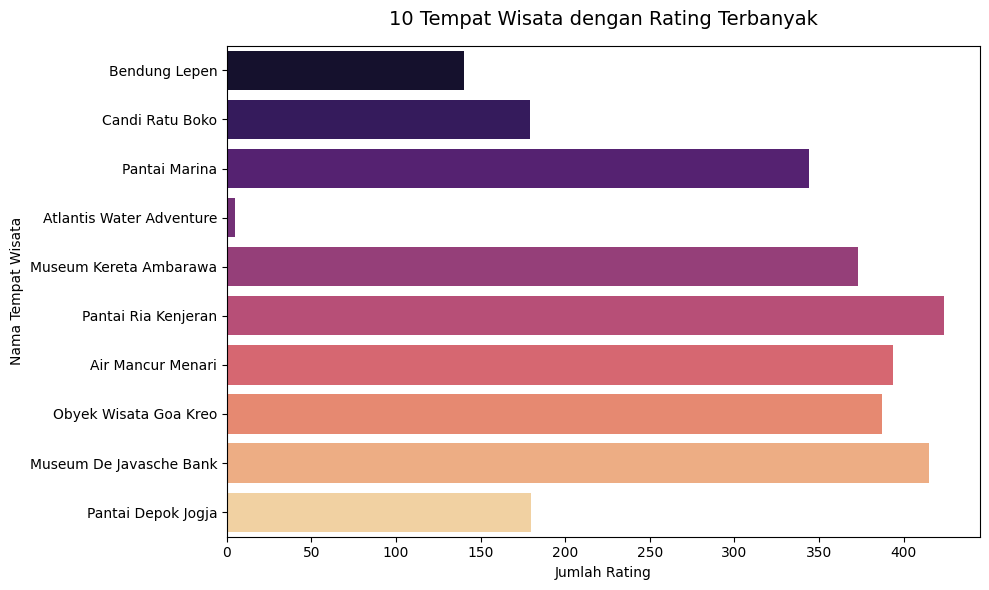

In [160]:
# Step 1: Hitung jumlah rating per Place_Id
top_10 = wisata_new['id'].value_counts().head(10).reset_index()
top_10.columns = ['Place_Id', '']

# Step 2: Gabungkan dengan nama tempat wisata
top_10 = pd.merge(top_10, preparation[['Place_Id', 'Place_Name']], how='left', on='Place_Id')

# Step 3: Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='Place_Name', x='Place_Id', palette='magma')
plt.title('10 Tempat Wisata dengan Rating Terbanyak', fontsize=14, pad=15)
plt.xlabel('Jumlah Rating')
plt.ylabel('Nama Tempat Wisata')
plt.tight_layout()
plt.show()


Menghitung jumlah Place_Id, Menggabungkan dengan nama wisata, serta memvisualisasikannya

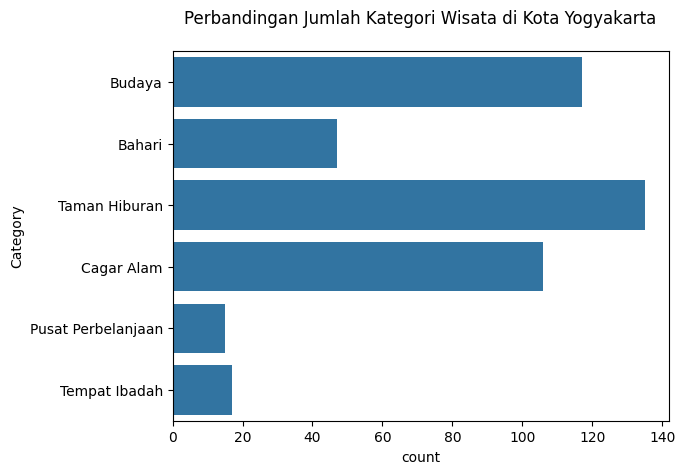

In [161]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Yogyakarta', pad=20)
plt.show()

Menampilkan perbandingan jumlah kategori wisata di Yogyakarta

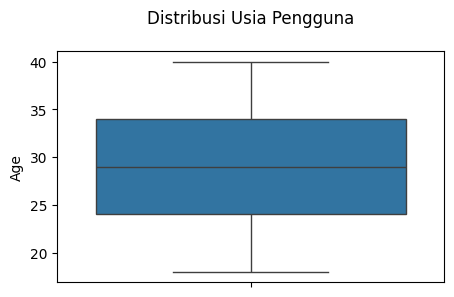

In [162]:
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia Pengguna', pad=20)
plt.show()

Visualisasi Distribusi Usia Pengguna

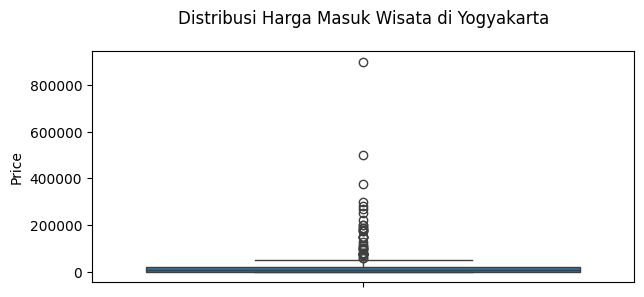

In [163]:
plt.figure(figsize=(7,3))
sns.boxplot(wisata['Price'])
plt.title('Distribusi Harga Masuk Wisata di Yogyakarta', pad=20)
plt.show()

Visualisasi Distribusi Harga Masuk Wisata di Ypgyakarta

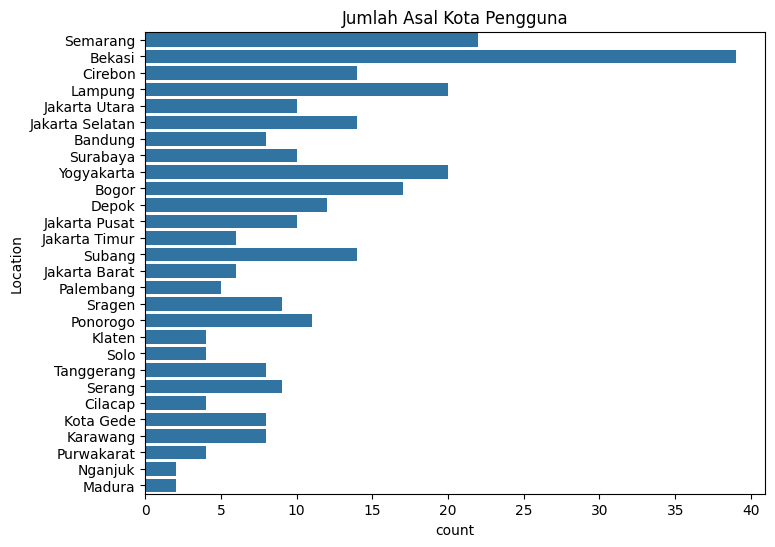

In [164]:
# Distribusi asal kota pengguna
askot = user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota Pengguna')
plt.show()

Visualisai Distribusi Jumlah Asal Kota Pengguna

# Model Development Content Based Filtering

In [165]:
data = wisata_new
data.sample(5)

,id,name,category,description,city,city_category
25,328,Gua Pawon,Cagar Alam,Gua Pawon adalah sebuah gua alami dan situs pu...,Bandung,Bandung Cagar Alam
386,231,The Great Asia Africa,Taman Hiburan,Kota Bandung tampaknya tidak pernah kehabisan ...,Bandung,Bandung Taman Hiburan
286,47,Taman Situ Lembang,Taman Hiburan,Taman Situ Lembang adalah sebuah taman kota ya...,Jakarta,Jakarta Taman Hiburan
8,154,Pantai Ngrawe (Mesra),Bahari,Kabupaten Gunungkidul jadi salah satu wilayah ...,Yogyakarta,Yogyakarta Bahari
105,395,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya,Surabaya Taman Hiburan


Menampilkan data sampel wisata_new

## TF-IDF Vectorizer

$$ TF-IDF = Term Frequency – Inverse Document Frequency $$

Mengubah teks menjadi vektor numerik berdasarkan pentingnya kata dalam dokumen dan seluruh koleksi data

 Teknik tersebut juga akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori wisata.

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data city_category
tf.fit(data['city_category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

print("Features Name: ", list(tf.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


Melakukan inisialisasi TfidVectorizer, menghitung idf pada city_category, serta mapping array dari fitur index integer ke fitur nama

In [167]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['city_category'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(437, 15)

Perhatikanlah, matriks yang kita miliki berukuran (437, 15). Nilai 437 merupakan ukuran data dan 15 merupakan matrik kategori city_category.

In [168]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.69559204],
        [0.        , 0.72824058, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.5360408 , 0.        ,
         0.        ],
        ...,
        [0.        , 0.7724966 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.55900007, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.57127819, 0.        ,
         0.58930677]])

Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense

In [169]:
# Membuat dataframe untuk melihat tf-idf matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=list(tf.vocabulary_.keys()),
    index=data.name
).sample(10)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Waterboom PIK (Pantai Indah Kapuk),0.000000,0.000000,0.000000,0.000000,0.000000,0.536041,0.000000,0.652166,0.0,0.0,0.000000,0.000000,0.536041,0.000000,0.000000
Museum Ullen Sentalu,0.000000,0.000000,0.000000,0.718437,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.695592
Kawah Putih,0.589758,0.000000,0.551699,0.000000,0.589758,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Museum De Javasche Bank,0.000000,0.000000,0.000000,0.581723,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.813387,0.000000,0.000000,0.000000
Water Blaster Bukit Candi Golf,0.000000,0.000000,0.000000,0.000000,0.000000,0.503799,0.000000,0.000000,0.0,0.0,0.701693,0.000000,0.503799,0.000000,0.000000
Pulau Bidadari,0.000000,0.772497,0.000000,0.000000,0.000000,0.000000,0.000000,0.635019,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Happyfarm Ciwidey,0.589758,0.000000,0.551699,0.000000,0.589758,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Ledok Sambi,0.591021,0.000000,0.000000,0.000000,0.591021,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.548987
Air Terjun Kedung Pedut,0.591021,0.000000,0.000000,0.000000,0.591021,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.548987


Membuat dataframe untuk melihat tf-idf matrix

## Cosine Similarity

Cosine Similarity mengukur kemiripan antara dua vektor berdasarkan sudut (bukan panjangnya).

Nilai berada di antara `-1` hingga `1`:

`1` → sangat mirip (arah vektor sama)

`0` → tidak mirip (tegak lurus)

`-1` → berlawanan (jarang terjadi di NLP)

**Rumus Cosine Similarity**

$$
\text{cosine_similarity}(A, B) = \frac{A \cdot B}{\|A\| \times \|B\|}
$$

Keterangan:
- $ A \cdot B $: dot product antara vektor A dan B  
- $ \|A\| $: panjang (norma) dari vektor A  
- $ \|B\| $: panjang (norma) dari vektor B

In [170]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4099171 ],
       [0.        , 1.        , 0.        , ..., 0.56256337, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.41413775, 0.39938865,
        0.61245683],
       ...,
       [0.        , 0.56256337, 0.41413775, ..., 1.        , 0.38888769,
        0.        ],
       [0.        , 0.        , 0.39938865, ..., 0.38888769, 1.        ,
        0.        ],
       [0.4099171 , 0.        , 0.61245683, ..., 0.        , 0.        ,
        1.        ]])

Menghitung cosine similarity pada matrix tf-idf

In [171]:
# Membuat dataframe dari variabel cosine_sim
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name'], columns=data['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap tempat
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


name,Taman Kasmaran,Sumur Gumuling,Museum Sri Baduga,Museum Joang 45,Taman Film
name,,,,,
Hutan Pinus Pengger,0.575619,1.000000,0.000000,0.00000,0.000000
Kebun Tanaman Obat Sari Alam,0.000000,0.000000,0.385155,0.00000,0.385155
Museum Kereta Ambarawa,0.557327,0.000000,0.435010,0.40028,0.435010
Gembira Loka Zoo,0.000000,0.323522,0.000000,0.00000,0.000000
Museum Wayang,0.000000,0.000000,0.471694,1.00000,0.471694
Pantai Marina,0.480885,0.000000,0.000000,0.00000,0.000000
Pantai Kukup,0.000000,0.336966,0.000000,0.00000,0.000000
Taman Barunawati,0.490531,0.556234,0.000000,0.00000,0.000000
Desa Wisata Rumah Domes/Teletubbies,0.575619,1.000000,0.000000,0.00000,0.000000


Membuat dataframe dari variabel cosine_sim dan melihat similarity pada setiap tempat

## Mendapatkan Rekomendasi

In [172]:
def rekomendasi_wisata(place_name, similarity_data=cosine_sim_df, items=data[['name','category','description','city']], k=5):

      # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
      # Dataframe diubah menjadi numpy
      # Range(start, stop, step)
      index = similarity_data.loc[:,place_name].to_numpy().argpartition(
          range(-1, -k, -1))

      # Mengambil data dengan similarity terbesar dari index yang ada
      closest = similarity_data.columns[index[-1:-(k+2):-1]]

      # Drop place_name agar nama tempat wisata yang dicari tidak muncul dalam daftar rekomendasi
      closest = closest.drop(place_name, errors='ignore')

      return pd.DataFrame(closest).merge(items).head(k)


Dengan menggunakan argpartition, kita mengambil sejumlah nilai `k` tertinggi dari similarity data (dalam kasus ini: `dataframe cosine_sim_df`). Kemudian, mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Lalu menghapus `place_name` yang yang dicari agar tidak muncul dalam daftar rekomendasi.

In [173]:
# Mendapatkan rekomendasi Candi yang mirip dengan Candi Prambanan
rekomendasi_wisata('Candi Prambanan')

,name,category,description,city
0,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta
1,Taman Budaya Yogyakarta,Budaya,Taman Budaya Yogyakarta (TBY) (Hanacaraka:ꦠꦩꦤ꧀...,Yogyakarta
2,Monumen Yogya Kembali,Budaya,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Yogyakarta
3,Museum Benteng Vredeburg Yogyakarta,Budaya,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Yogyakarta
4,Bukit Panguk Kediwung,Budaya,Bukit Panguk Kediwung adalah salah satu obyek ...,Yogyakarta


Menampilkan hasil rekomendasi untuk Candi yang mirip dengan Candi Prambanan

In [174]:
# Mendapatkan rekomendasi Museum yang mirip dengan Museum Geologi Bandung
rekomendasi_wisata('Museum Geologi Bandung')

,name,category,description,city
0,Bandros City Tour,Budaya,Bandros atau Bus Wisata Bandung adalah bus wis...,Bandung
1,Jalan Braga,Budaya,Jalan Braga adalah nama sebuah jalan utama di ...,Bandung
2,Amazing Art World,Budaya,"Amazing Art World Bandung, sebuah objek wisata...",Bandung
3,Taman Budaya Jawa Barat,Budaya,Taman Budaya Jawa Barat (TBJB) didirikan pada ...,Bandung
4,Museum Mandala Wangsit Siliwangi,Budaya,Museum Wangsit Mandala Siliwangi adalah museum...,Bandung


Menampilkan hasil rekomendasi untuk Museum yang mirip dengan Museum Geologi Bandung

## Metrik Evaluasi

### Precision

Precision **mengukur seberapa banyak rekomendasi yang benar dari total yang diberikan**.

$$
\text{Precision@k} = \frac{\text{Jumlah item relevan dalam top-}k}{k}
$$


Fokus: Akurasi dari hasil yang ditampilkan ke user.

Hasil: Sistem merekomendasikan 5 tempat wisata, dan 4 sesuai selera user berdasarkan input →

```
Input: 'Candi Prambanan', category = Budaya
Dataset:
0 - Cqndi Batu Ruko                        → Budaya ✅
1 - Taman Budaya Yogyakarta                → Budaya ✅
2 - Monumen Yogya Kembali                  → Budaya ✅
3 - Museum Benteng Vredeburg Yogyakarta    → Budaya ✅
4 - Bukit Panguk Kediwung                  → Budaya ✅
```

$$
Precision@5=\dfrac{5}{5}= 1.00
$$

# Model Development dengan Collaborative Filtering

In [175]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Kita akan menerapkan teknik collaborative filtering untuk membuat sistem rekomendasi. Teknik ini membutuhkan data rating dari user.

In [176]:
# Membaca dataset
df = rating
df

,User_Id,Place_Id,Place_Ratings,user,place
0,1,179,3.0,0,0
1,1,344,2.0,0,1
2,1,5,5.0,0,2
3,1,373,3.0,0,3
4,1,101,4.0,0,4
...,...,...,...,...,...
9995,300,425,2.0,299,324
9996,300,64,4.0,299,132
9997,300,311,3.0,299,348
9998,300,279,4.0,299,290


Membaca data set rating

## Data Preparation

Pada tahap ini, perlu melakukan persiapan data untuk menyandikan (encode) fitur `user` dan `placeID` ke dalam indeks integer.

In [177]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User_Id'].unique().tolist()
print('List User_Id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)

List User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

Mengubah user_Id menjadi list tanpa nilai yang sama, melakukan encoding, dam proses encoding angka ke user_Id

In [178]:
# Mengubah placeID menjadi list tanpa nilai yang sama
place_ids = df['Place_Id'].unique().tolist()

# Melakukan proses encoding placeID
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

# Melakukan proses encoding angka ke placeID
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

Mengubah place_Id menjadi list tanpa nilai yang sama, melakukan encoding, dam proses encoding angka ke place_Id

In [179]:
# Mapping userID ke dataframe user
df['user'] = df['User_Id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['place'] = df['Place_Id'].map(place_to_place_encoded)

Melakukan pemetaan  `userID` dan `placeID` ke dataframe yang berkaitan.

In [180]:
# Mendapatkan jumlah user
num_user = len(user_to_user_encoded)
print(num_user)

# Mendapatkan jumlah wisata
num_place = len(place_encoded_to_place)
print(num_place)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['Place_Ratings'])

# Nilai maksimal rating
max_rating = max(df['Place_Ratings'])

print('Number of User: {}, Number of Wisata: {}, Min Rating: {}, Max Rating: {}'.format(
    num_user, num_place, min_rating, max_rating
))

300
437
Number of User: 300, Number of Wisata: 437, Min Rating: 1.0, Max Rating: 5.0


Mendapatkan jumlah user dan jumlah wisata, mengubah rating menjadi float, dan mengidentifikasi nilai minimum dan maksumum pada rating.

## Membagi Data untuk Training dan Validasi

In [181]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


Mengacak datanya terlebih dahulu agar distribusinya menjadi random

Selain itu kita juga melakukan proses normalisasi untuk rating dengan menggunakan metode `MinMax` normalization agar nantinya model lebih mudah untuk dilatih

In [182]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


Selanjutnya, melakukan pembagian data train dan validasi dengan komposisi 80:20.

## Proses Training

In [183]:
class RecommenderNet(tf.keras.Model):

  # Melakukan Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.place_embedding = layers.Embedding( # layer embeddings resto
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

Pada tahap ini, model menghitung skor kecocokan antara pengguna dan tempat wisata dengan **teknik embedding**. Selanjutnya, lakukan operasi **perkalian dot product** antara embedding user dan place. Selain itu, kita juga dapat menambahkan *bias* untuk setiap user dan place. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi **aktivasi sigmoid**.

In [184]:
model = RecommenderNet(num_user, num_place, 100) # inisialisasi model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [185]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6968 - root_mean_squared_error: 0.3475 - val_loss: 0.6972 - val_root_mean_squared_error: 0.3477
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6886 - root_mean_squared_error: 0.3413 - val_loss: 0.6974 - val_root_mean_squared_error: 0.3478
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6844 - root_mean_squared_error: 0.3392 - val_loss: 0.6978 - val_root_mean_squared_error: 0.3481
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6765 - root_mean_squared_error: 0.3342 - val_loss: 0.6996 - val_root_mean_squared_error: 0.3493
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6746 - root_mean_squared_error: 0.3303 - val_loss: 0.7007 - val_root_mean_squared_error: 0.3500
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6711 - root_mean_squared_error: 0.3292 - val_loss: 0.7016 - val_root_mean_squared_error: 0.3506
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━

Melakukan training

## Visualisasi Metrik

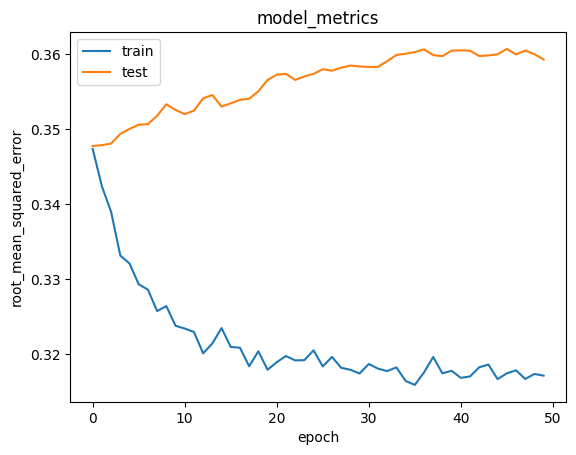

In [186]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perhatikanlah, proses training model cukup smooth dan model konvergen pada epochs sekitar 50. Dari proses ini, diperoleh nilai error akhir sebesar sekitar 0.31 dan error pada data validasi sebesar 0.35. Nilai tersebut cukup bagus untuk sistem rekomendasi.

## Mendapatkan Rekomendasi Wisata

Untuk mendapatkan rekomendasi tempat wisata, diambil sampel user secara acak dan definisikan variabel `place_not_visited` yang merupakan daftar wisata yang belum pernah dikunjungi oleh pengguna. Rating digunakan untuk membuat rekomendasi wisata yang mungkin cocok untuk pengguna.

In [187]:
place_df = wisata_new
df = pd.read_csv('tourism_rating.csv')

# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

# Operator bitwise
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

Mengambil sample user dan menggunakan variabel place_not_visited pada operator bitwise

In [188]:
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [ place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices]

print('Menampilkan rekomnendasi wisata untuk pengguna: {}'.format(user_id))
print('===' * 9)
print('Tempat wisata dengan rating tertinggi dari pengguna')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(by = 'Place_Ratings',ascending=False )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Menampilkan rekomnendasi wisata untuk pengguna: 137
Tempat wisata dengan rating tertinggi dari pengguna
--------------------------------


,id,name,category,description,city,city_category
34,371,Wisata Eling Bening,Cagar Alam,Sebuah fasilitas wisata yang dikelola dengan c...,Semarang,Semarang Cagar Alam
53,321,Glamping Lakeside Rancabali,Taman Hiburan,Glamping Lakeside Rancabali menawarkan tempat ...,Bandung,Bandung Taman Hiburan
118,27,Sea World,Taman Hiburan,Seaworld Indonesia adalah sebuah miniatur peso...,Jakarta,Jakarta Taman Hiburan
393,79,Taman Spathodea,Taman Hiburan,Objek Wisata Taman Spathodea di Jagakarsa DKI ...,Jakarta,Jakarta Taman Hiburan
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya


Menampilkan  jumlah rekomendasi wisata untuk pengguna dan tempat wisata yang memiliki rating tertinggi

In [189]:
print('----' * 8)
print('Top 10 Rekomendasi Wisata')
print('----' * 8)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 Rekomendasi Wisata
--------------------------------


,id,name,category,description,city,city_category
102,97,Monumen Yogya Kembali,Budaya,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Yogyakarta,Yogyakarta Budaya
135,243,Kampung Korea Bandung,Budaya,Kampung Korea adalah sebuah kawasan di kota Ba...,Bandung,Bandung Budaya
184,253,Selasar Sunaryo Art Space,Taman Hiburan,Selasar Sunaryo Art Space (SSAS) adalah sebuah...,Bandung,Bandung Taman Hiburan
187,416,Keraton Surabaya,Budaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Surabaya,Surabaya Budaya
226,94,Sumur Gumuling,Taman Hiburan,Sumur Gumuling adalah salah satu tempat untuk ...,Yogyakarta,Yogyakarta Taman Hiburan
280,256,Wisata Batu Kuda,Cagar Alam,Kawasan Batu Kuda berupa perbukitan dengan hut...,Bandung,Bandung Cagar Alam
370,263,Curug Batu Templek,Cagar Alam,Curug Batu Templek Bandung adalah sebuah wisat...,Bandung,Bandung Cagar Alam
397,254,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung,Bandung Taman Hiburan
398,117,The World Landmarks - Merapi Park Yogyakarta,Taman Hiburan,Merapi Park merupakan salah satu tempat wisata...,Yogyakarta,Yogyakarta Taman Hiburan
422,232,Bukit Moko,Cagar Alam,Bandung sebagai destinasi wisata tak pernah ad...,Bandung,Bandung Cagar Alam


Menampilkan Top 10 Rekomendasi Wisata

Model untuk menampilkan top 10 rekomendasi tempat wisata telah selesai dibuat dan model ini dapat digunakan untuk menampilkan rekomendasi kepada user sehingga dapat meningkatkan minat pengguna terhadap pariwisata di Indonesia